In [ ]:
# <a> Uk countries average eating habits using Auto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/UK_foods.csv', index_col =0)

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.T

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


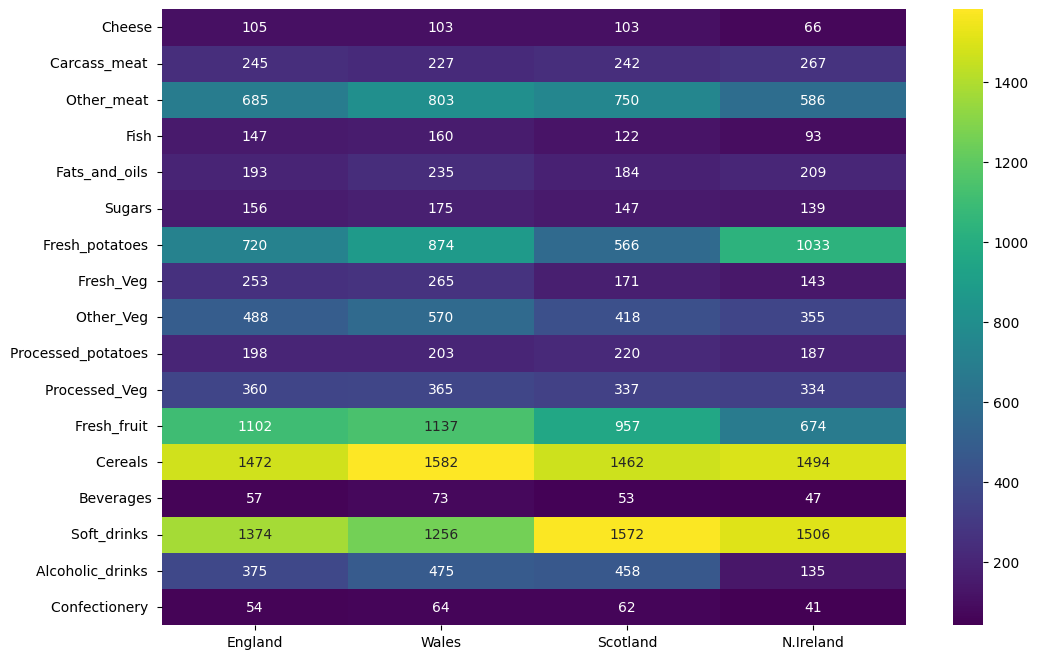

In [5]:
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(df, annot=True, fmt='.0f', cmap='viridis');

# <a> Built AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
df.shape

(17, 4)

#<a> Encoder

17 => 8 => 4 => 2

In [8]:
encoder = Sequential()

encoder.add(Dense(8, activation='relu', input_shape=[17]))
encoder.add(Dense(4, activation='relu', input_shape=[8]))
encoder.add(Dense(2, activation='relu', input_shape=[4]))

# <a> Decoder
2 => 4 => 8 => 17

In [9]:
decoder = Sequential()

decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu', input_shape=[4]))
decoder.add(Dense(17, activation='relu', input_shape=[8]))

# <a> AutoEncoder

In [10]:
autoencoder = Sequential([encoder, decoder])

In [11]:
# compile
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

# <a> Scaling data

In [12]:
df.T

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler= MinMaxScaler()

In [15]:
scaler_df = scaler.fit_transform(df.T.values)

In [16]:
scaler_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [17]:
scaler_df.shape

(4, 17)

# <a> Training

In [18]:
autoencoder.fit(scaler_df, scaler_df, epochs =15, verbose= 1)

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 0.4182
Epoch 2/15
1/1 [==============================] - 0s 23ms/step - loss: 0.3651
Epoch 3/15
1/1 [==============================] - 0s 32ms/step - loss: 0.3352
Epoch 4/15
1/1 [==============================] - 0s 22ms/step - loss: 0.3236
Epoch 5/15
1/1 [==============================] - 0s 21ms/step - loss: 0.3208
Epoch 6/15
1/1 [==============================] - 0s 17ms/step - loss: 0.3193
Epoch 7/15
1/1 [==============================] - 0s 18ms/step - loss: 0.3181
Epoch 8/15
1/1 [==============================] - 0s 15ms/step - loss: 0.3170
Epoch 9/15
1/1 [==============================] - 0s 15ms/step - loss: 0.3159
Epoch 10/15
1/1 [==============================] - 0s 13ms/step - loss: 0.3148
Epoch 11/15
1/1 [==============================] - 0s 14ms/step - loss: 0.3136
Epoch 12/15
1/1 [==============================] - 0s 21ms/step - loss: 0.3124
Epoch 13/15
1/1 [==============================] - 0s 22ms/step

# <a> Prdiction use encoder part

In [19]:
encod_2dim = encoder.predict(scaler_df)

1/1 [==============================] - 0s 193ms/step


In [20]:
encod_2dim.shape

(4, 2)

In [21]:
encod_2dim

array([[1.2761474 , 0.15477574],
       [2.681634  , 0.00740989],
       [1.2416928 , 0.        ],
       [0.7166488 , 0.34391627]], dtype=float32)

# <a> Prep Data on Reduction Dimention

In [22]:
df.T.head(2)

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64


In [23]:
country_index = df.T.index

In [24]:
country_index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [25]:
result = pd.DataFrame(data= encod_2dim, index = country_index, columns =['C1', 'C2'])

In [26]:
result = result.reset_index().rename(columns={'index':'Country'})

In [27]:
result

,Country,C1,C2
0,England,1.276147,0.154776
1,Wales,2.681634,0.007410
2,Scotland,1.241693,0.000000
3,N.Ireland,0.716649,0.343916


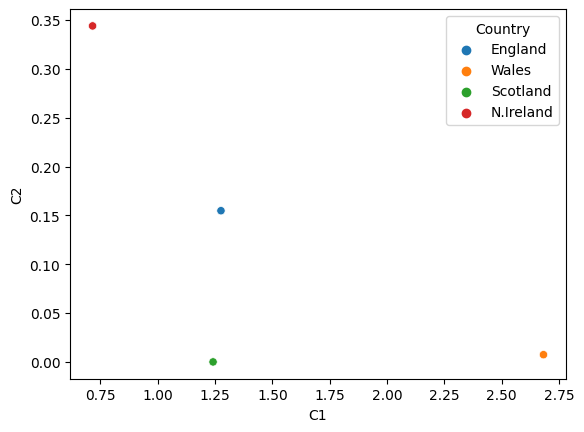

In [28]:
sns.scatterplot(x='C1', y='C2', data=result, hue='Country');

In [29]:
df.T

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41
